In [1]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(200, (3,3), input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history = model.fit(train_data, train_target, epochs=20, callbacks=[checkpoint], validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.7204 - accuracy: 0.5253WARNING:tensorflow:From /home/suraj/tensorflow/tf/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model/assets
31/31 [==============================] - 114s 4s/step - loss: 0.7204 - accuracy: 0.5253 - val_loss: 0.6356 - val_accuracy: 0.5645
Epoch 2/20
31/31 [==============================] - 117s 4s/step - loss: 0.5527 - accuracy: 0.7111 - val_loss: 0.4006 - val_accuracy: 0.8669
Epoch 3/20
31/31 [==============================] - 118s 4s/step - loss: 0.3089 - accuracy: 0.8768 - val_loss: 0.2233 - val_accuracy: 0.9153
Epoch 4/20
31/31 [==============================] - 128s 4s/step 

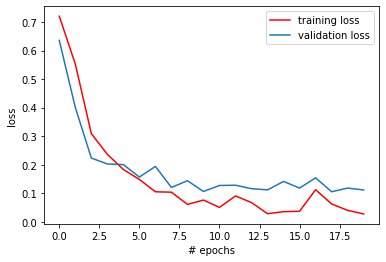

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], 'r', label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

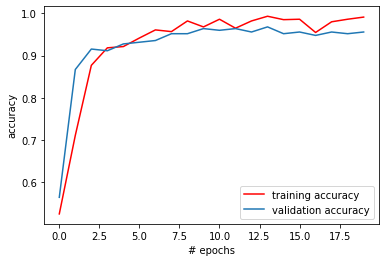

In [6]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], 'r', label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [1]:
print(model.evaluate(test_data, test_target))

NameError: name 'model' is not defined

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model, save_model
from tensorflow import lite

ModuleNotFoundError: No module named 'tensorflow'

In [1]:
import os
basedir = os.path.abspath(os.path.dirname('Face Mask Detector'))
basedir

'/home/suraj/Face mask detector'

In [2]:
keras_file = basedir + '/mask_detection.h5'
save_model(model, keras_file)

NameError: name 'save_model' is not defined

In [ ]:
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
f = open("mask_detection.tflite", 'wb')
f.write(tflite_model)